<a href="https://colab.research.google.com/github/X-ray-Dawgz/XRayDawgz/blob/rob/With_new_testset_Updated_CS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b master https://github.com/X-ray-Dawgz/XRayDawgz.git

Cloning into 'XRayDawgz'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3986 (delta 11), reused 4 (delta 1), pack-reused 3960
Receiving objects: 100% (3986/3986), 125.49 MiB | 35.45 MiB/s, done.
Resolving deltas: 100% (449/449), done.
Checking out files: 100% (9033/9033), done.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from tensorflow import keras

import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# image size
img_width, img_height = 379,288
# train and test sample sizes
train_samples = 665
test_samples = 98
# set weights
epochs = 75
batch_size = 20
# Directories of train and test data
train_dir = 'XRayDawgz/cut_image/Train'
test_dir = 'XRayDawgz/cut_image/Test'

# data image augmentation to create more variation of XRD patterns
train_data = ImageDataGenerator(rescale=1. / 255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# only resize for test data
test_data = ImageDataGenerator(rescale=1. / 255)

# import train data consisting of 'binary' or  2 classifications (BCC or FCC) 
train_gen = train_data.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='binary',)

# import test data consisting of 'binary' or  2 classifications (BCC or FCC) 
test_gen = test_data.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 1330 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [4]:
# build CNN model
model = Sequential()
# extract features by iterating across image

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), activation='relu',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(96, (3, 3), activation='relu',
                 input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# model.summary()

# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# train model
cs_classification = model.fit_generator(train_gen,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=test_samples // batch_size)




Epoch 1/75





33/33 [==============================] - 26s 800ms/step - loss: 1.5222 - acc: 0.4848 - val_loss: 0.6938 - val_acc: 0.4250
Epoch 2/75
33/33 [==============================] - 16s 494ms/step - loss: 0.6958 - acc: 0.5121 - val_loss: 0.6928 - val_acc: 0.5375
Epoch 3/75
33/33 [==============================] - 17s 504ms/step - loss: 0.7153 - acc: 0.4712 - val_loss: 0.6931 - val_acc: 0.5132
Epoch 4/75
33/33 [==============================] - 17s 506ms/step - loss: 0.6934 - acc: 0.4727 - val_loss: 0.6931 - val_acc: 0.5250
Epoch 5/75
33/33 [==============================] - 16s 479ms/step - loss: 0.7117 - acc: 0.5515 - val_loss: 0.6887 - val_acc: 0.5526
Epoch 6/75
33/33 [==============================] - 16s 500ms/step - loss: 0.6966 - acc: 0.5288 - val_loss: 0.6941 - val_acc: 0.4375
Epoch 7/75
33/33 [==============================] - 16s 487ms/step - loss: 0.6989 - acc: 0.5182 - val_loss: 0.7146 - val_acc: 0.4875
Epoch 8/75
33/33 [==============================] - 16s 494ms

loss: 0.39
Validation loss: 0.17
Accuracy: 0.83
Validation Accuracy: 0.97
Mean Loss: 0.54
Mean Validation Loss: 0.47
Mean Accuracy: 0.72
Mean Validation Accuracy: 0.80


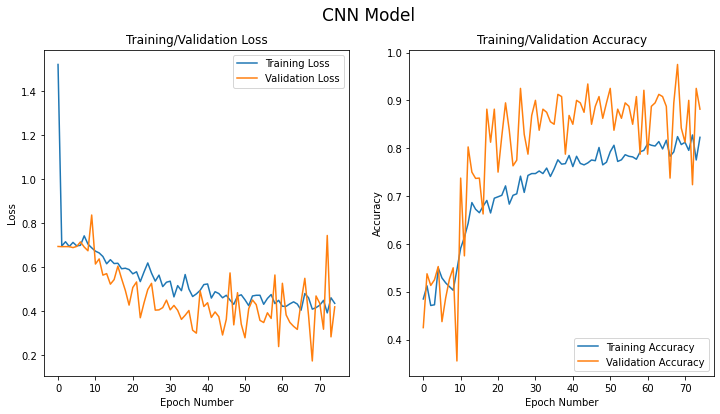

In [6]:
# plot model data
x = np.arange(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.2)
fig.suptitle("CNN Model", y=.98, fontsize=17)
ax[0].set_xlabel("Epoch Number")
ax[1].set_xlabel("Epoch Number")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Accuracy")
ax[0].plot(x, cs_classification.history["loss"], label="Training Loss")
ax[0].plot(x, cs_classification.history["val_loss"], label="Validation Loss")
ax[1].plot(x, cs_classification.history["acc"], label="Training Accuracy")
ax[1].plot(x, cs_classification.history["val_acc"], label="Validation Accuracy")
ax[0].set_title('Training/Validation Loss')
ax[1].set_title('Training/Validation Accuracy')
ax[0].legend(loc="upper right")
ax[1].legend(loc="lower right")
print('loss: %.2f' %(np.amin(cs_classification.history["loss"])))
print('Validation loss: %.2f' %(np.amin(cs_classification.history["val_loss"])))
print('Accuracy: %.2f' %(np.amax(cs_classification.history["acc"])))
print('Validation Accuracy: %.2f' %(np.amax(cs_classification.history["val_acc"])))
print('Mean Loss: %.2f' %(np.mean(cs_classification.history["loss"])))
print('Mean Validation Loss: %.2f' %(np.mean(cs_classification.history["val_loss"])))
print('Mean Accuracy: %.2f' %(np.mean(cs_classification.history["acc"])))
print('Mean Validation Accuracy: %.2f' %(np.mean(cs_classification.history["val_acc"])))

In [7]:
# run model iterating to predict FCC or BCC test images
BCC_test_dir = 'XRayDawgz/XRayDawgz/Images/Test/BCC_test/'
FCC_test_dir = 'XRayDawgz/XRayDawgz/Images/Test/FCC_test/'

BCC_Prediction = np.zeros(test_samples)
FCC_Prediction = np.zeros(test_samples)
i=0
correct_count=0
for file in os.listdir(BCC_test_dir):
  predict_img_BCC = image.load_img(BCC_test_dir + file, target_size = (img_width, img_height))
  predict_img_BCC = image.img_to_array(predict_img_BCC)
  predict_img_BCC = np.expand_dims(predict_img_BCC, axis = 0)
  result = model.predict(predict_img_BCC)
  if np.round(result, 0) == 0:
    correct_count += 1
  else:
    pass
print('BCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

i=0
correct_count=0
for file in os.listdir(FCC_test_dir):
  predict_img_FCC = image.load_img(FCC_test_dir + file, target_size = (img_width, img_height))
  predict_img_FCC = image.img_to_array(predict_img_FCC)
  predict_img_FCC = np.expand_dims(predict_img_FCC, axis = 0)
  result = model.predict(predict_img_FCC)
  if np.round(result, 0) == 1:
    correct_count += 1
  else:
    pass
print('FCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

BCC prediction accuracy: 63.27%
FCC prediction accuracy: 93.88%


In [0]:
model.save('XRayDawgz/XRayDawgz/classification_modelv3.h5')

In [9]:
new_model = keras.models.load_model('XRayDawgz/XRayDawgz/classification_modelv3.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
